In [144]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
from notebook_utils import load_results, plot_results

In [146]:
results = {}

In [147]:
results["cs-uk, TLM+SO"] = load_results("mbert_full8M_1epoch_finegrained_bs16", lang="en-fr", script_params=["--oneRef"])

In [148]:
results["multi, TLM+SO"] = load_results("mbert_multilingual_1M-per-lang", lang="en-fr", script_params=["--oneRef"])

In [149]:
results["multi, TLM only"] = load_results("mbert_multilingual_1M-per-lang_only_tlm", lang="en-fr", script_params=["--oneRef"])

In [160]:
results["multi, TLM->TLM+SO lr2e-5"] = load_results("mbert_multilingual_1M-per-lang_only_tlm_add_so", lang="en-fr", script_params=["--oneRef"], baseline="mbert_multilingual_1M-per-lang_only_tlm/checkpoint-335000")

In [162]:
results["multi, TLM->TLM+SO lr1e-5"] = load_results("mbert_multilingual_1M-per-lang_only_tlm_add_so_lr1e-5", lang="en-fr", script_params=["--oneRef"], baseline="mbert_multilingual_1M-per-lang_only_tlm/checkpoint-335000")

In [163]:
results["multi, TLM->TLM+SO lr5e-6"] = load_results("mbert_multilingual_1M-per-lang_only_tlm_add_so_lr5e-6", lang="en-fr", script_params=["--oneRef"], baseline="mbert_multilingual_1M-per-lang_only_tlm/checkpoint-335000")

In [164]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import statsmodels.api as sm

(0.0, 20000.0)

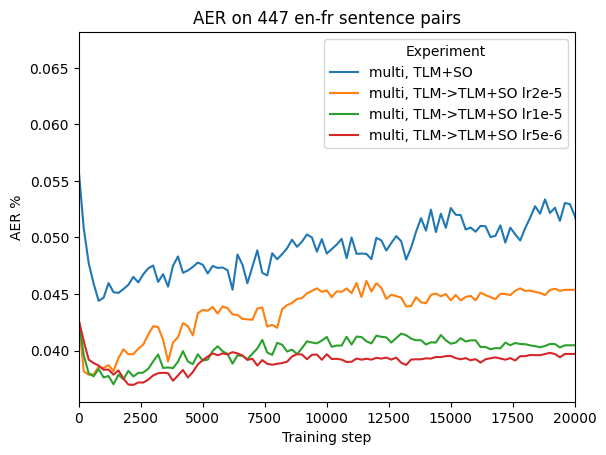

In [175]:
# plot results without any smoothing
subset = {k: v for k, v in results.items() if k in ["multi, TLM+SO", "multi, TLM->TLM+SO lr2e-5", "multi, TLM->TLM+SO lr1e-5", "multi, TLM->TLM+SO lr5e-6"]}
plot_results(plt, subset, "AER on 447 en-fr sentence pairs", smooth=False)
plt.xlim(0,20000)

(0.0, 12000.0)

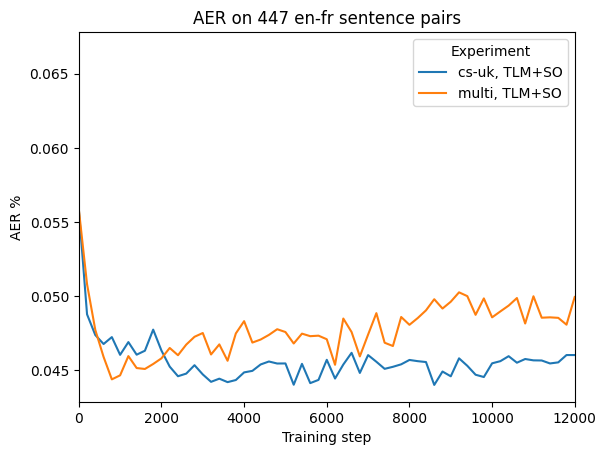

In [173]:
subset = {k: v for k, v in results.items() if k in ["cs-uk, TLM+SO", "multi, TLM+SO"]}
plot_results(plt, subset, "AER on 447 en-fr sentence pairs", smooth=False)
plt.xlim(0,12000)

(-20000.0, 400000.0)

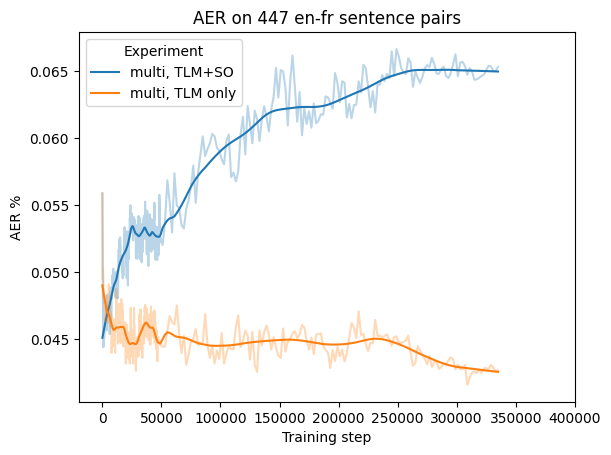

In [170]:
subset = {k: v for k, v in results.items() if k in ["multi, TLM+SO", "multi, TLM only"]}
plot_results(plt, subset, "AER on 447 en-fr sentence pairs", smooth=True)
plt.xlim(-20000, 400_000)